# Exploring Dandiset 001433: Breathing rhythm and place dataset

**Note:** This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results, and verify findings independently.

## Overview

This dandiset contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb (OB) electrophysiology in freely-behaving mice. The experiments were conducted without any stimulus, reward, or task, providing baseline measurements of neural activity and breathing patterns.

**Dandiset URL:** https://dandiarchive.org/dandiset/001433/0.250507.2356

The dataset includes:
- Local field potential (LFP) recordings from the olfactory bulb (16 channels, 1 kHz sampling rate)
- Sniffing signals from thermistor recordings (1 kHz sampling rate)
- Processed breathing event features (inhalation and exhalation times)
- Data from 4 subjects across 27 recording sessions

## Required Packages

The following packages are assumed to be installed:
- `dandi`
- `pynwb` 
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient

## Exploring the Dandiset with DANDI API

In [2]:
# Connect to the DANDI API and get dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")
print(f"Number of subjects: {metadata['assetsSummary']['numberOfSubjects']}")
print(f"Number of files: {metadata['assetsSummary']['numberOfFiles']}")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903
Number of subjects: 4
Number of files: 27


## Exploring Available NWB Files

In [3]:
# Get all NWB files in the dandiset
nwb_files = list(dandiset.get_assets_by_glob("*.nwb"))
print(f"Found {len(nwb_files)} NWB files")

# Display information about the files
for i, asset in enumerate(nwb_files[:10]):  # Show first 10 files
    print(f"{i+1:2d}. {asset.path}")

if len(nwb_files) > 10:
    print(f"    ... and {len(nwb_files) - 10} more files")

Found 27 NWB files
 1. sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
 2. sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb
 3. sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb
 4. sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb
 5. sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb
 6. sub-4127/sub-4127_ses-20250507T153010_ecephys.nwb
 7. sub-4127/sub-4127_ses-20250507T153020_ecephys.nwb
 8. sub-4127/sub-4127_ses-20250507T153032_ecephys.nwb
 9. sub-4127/sub-4127_ses-20250507T153048_ecephys.nwb
10. sub-4127/sub-4127_ses-20250507T153100_ecephys.nwb
    ... and 17 more files


## Loading and Exploring NWB File Structure

Let's load one representative file to understand the data structure. We'll use remote streaming to avoid downloading large files.

In [4]:
# Load the first NWB file using remote streaming
asset = nwb_files[0]
url = asset.download_url
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session ID: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject sex: {nwb.subject.sex}")

Session ID: 4122_4
Session description: LFP and sniff recording
Start time: 2025-05-07 15:29:27.359523-07:00
Subject ID: 4122
Subject age: P90D
Subject sex: M


## Examining Data Acquisition Streams

In [5]:
# Explore the acquisition data
print("Acquisition data streams:")
for name, data in nwb.acquisition.items():
    print(f"  {name}: {type(data).__name__}")
    if hasattr(data, 'data'):
        print(f"    Shape: {data.data.shape}")
        print(f"    Sampling rate: {data.rate} Hz")
        print(f"    Description: {data.description}")
    print()

Acquisition data streams:
  LFP: ElectricalSeries
    Shape: (1969184, 16)
    Sampling rate: 1000.0 Hz
    Description: LFP signal from olfactory bulb

  SniffSignal: TimeSeries
    Shape: (1969184,)
    Sampling rate: 1000.0 Hz
    Description: Raw sniff thermistor voltage



## Examining Processed Data

In [6]:
# Explore the processing modules
print("Processing modules:")
for module_name, module in nwb.processing.items():
    print(f"  {module_name}: {module.description}")
    print("    Data interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"      {interface_name}: {type(interface).__name__}")
        if hasattr(interface, 'data'):
            print(f"        Shape: {interface.data.shape}")
            print(f"        Description: {interface.description}")
    print()

Processing modules:
  behavior: Sniff event features
    Data interfaces:
      exhalation_time: TimeSeries
        Shape: (10030,)
        Description: exhalation_time (s)
      inhalation_time: TimeSeries
        Shape: (10030,)
        Description: inhalation_time (s)



## Visualizing LFP Data

Let's examine the local field potential recordings from the olfactory bulb.

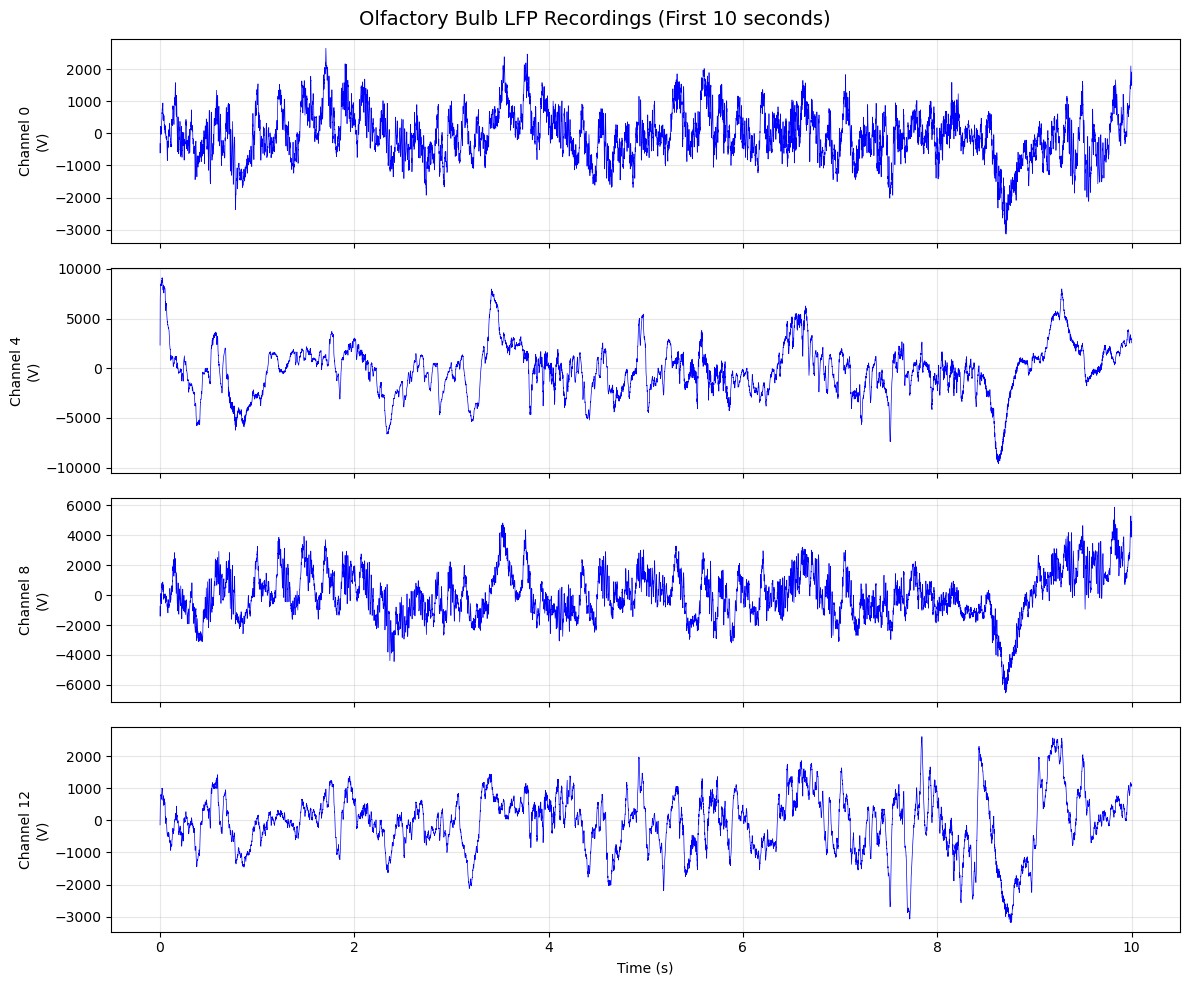

In [7]:
# Load LFP data (sample a subset to avoid loading too much data)
lfp = nwb.acquisition['LFP']
time_window = 10  # seconds
n_samples = int(time_window * lfp.rate)
lfp_data = lfp.data[:n_samples, :]  # First 10 seconds, all channels
time_axis = np.arange(n_samples) / lfp.rate

# Plot LFP from multiple channels
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
channels_to_plot = [0, 4, 8, 12]  # Sample 4 channels

for i, ch in enumerate(channels_to_plot):
    axes[i].plot(time_axis, lfp_data[:, ch], 'b-', linewidth=0.5)
    axes[i].set_ylabel(f'Channel {ch}\n(V)')
    axes[i].grid(True, alpha=0.3)

axes[-1].set_xlabel('Time (s)')
plt.suptitle('Olfactory Bulb LFP Recordings (First 10 seconds)', fontsize=14)
plt.tight_layout()
plt.show()

## Visualizing Sniffing Signal

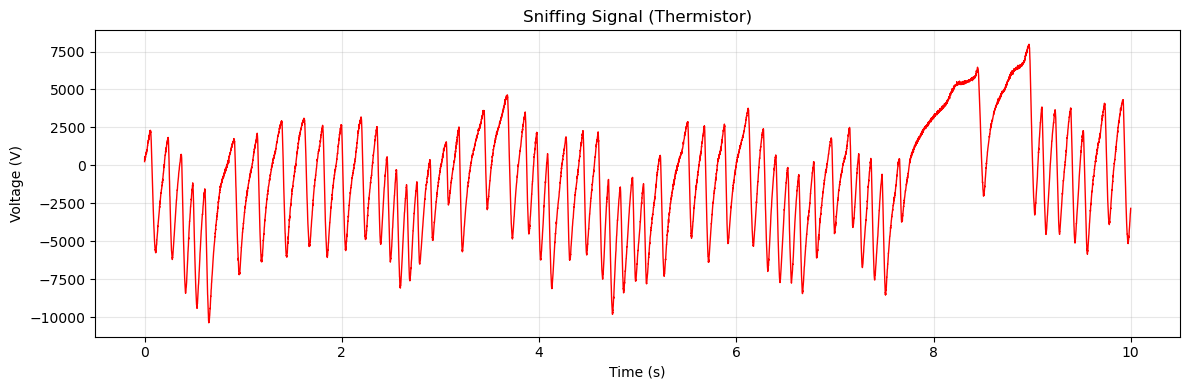

In [8]:
# Load sniffing data (same time window)
sniff = nwb.acquisition['SniffSignal']
sniff_data = sniff.data[:n_samples]

# Plot sniffing signal
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(time_axis, sniff_data, 'r-', linewidth=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.set_title('Sniffing Signal (Thermistor)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Analyzing Breathing Events

The dataset includes processed breathing event features. Let's examine the timing of inhalations and exhalations.

In [9]:
# Load breathing event data
behavior = nwb.processing['behavior']
inhalation_times = behavior.data_interfaces['inhalation_time']
exhalation_times = behavior.data_interfaces['exhalation_time']

# Get event timestamps (first 1000 events to avoid loading too much)
n_events = min(1000, len(inhalation_times.timestamps))
inh_timestamps = inhalation_times.timestamps[:n_events]
exh_timestamps = exhalation_times.timestamps[:n_events]

print(f"Number of breathing events examined: {n_events}")
print(f"Recording duration: {inh_timestamps[-1]:.1f} seconds")

Number of breathing events examined: 1000
Recording duration: 236952.0 seconds


## Breathing Rate Analysis

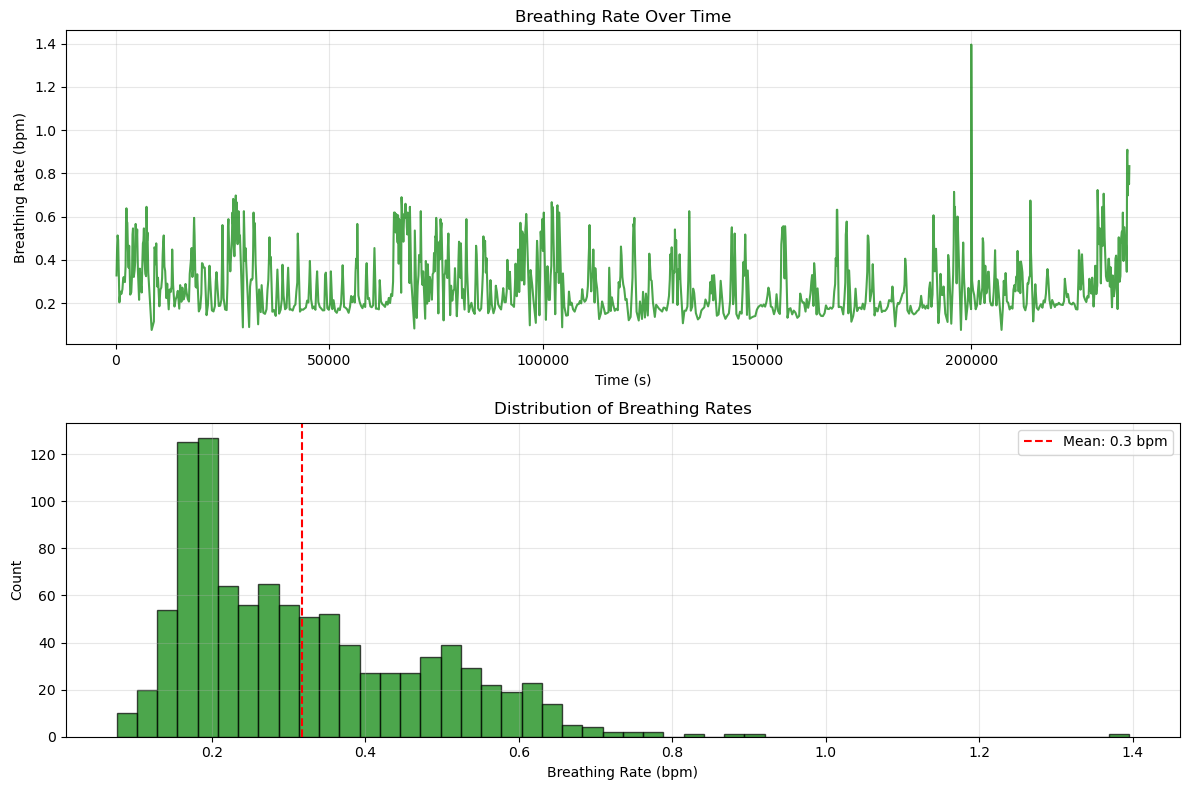

Mean breathing rate: 0.3 ± 0.2 bpm


In [10]:
# Calculate inter-breath intervals
inter_breath_intervals = np.diff(inh_timestamps)
breathing_rate = 60 / inter_breath_intervals  # breaths per minute

# Plot breathing rate over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Breathing rate over time
ax1.plot(inh_timestamps[1:], breathing_rate, 'g-', alpha=0.7)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Breathing Rate (bpm)')
ax1.set_title('Breathing Rate Over Time')
ax1.grid(True, alpha=0.3)

# Histogram of breathing rates
ax2.hist(breathing_rate, bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_xlabel('Breathing Rate (bpm)')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Breathing Rates')
ax2.axvline(np.mean(breathing_rate), color='red', linestyle='--', 
           label=f'Mean: {np.mean(breathing_rate):.1f} bpm')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean breathing rate: {np.mean(breathing_rate):.1f} ± {np.std(breathing_rate):.1f} bpm")

## Examining Breath Phase Duration

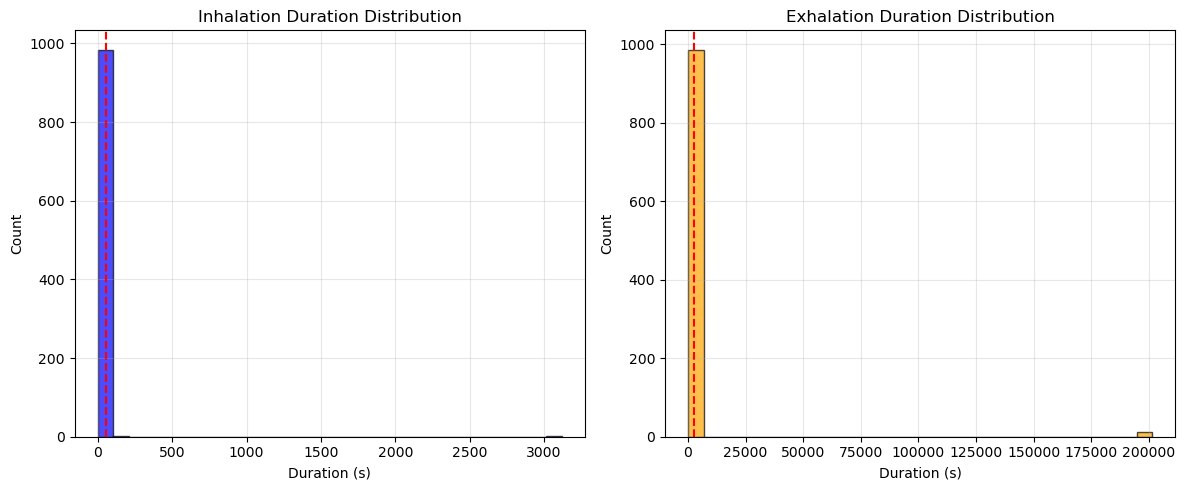

In [11]:
# Calculate duration of inhalation and exhalation phases
# Note: This is a simplified calculation assuming alternating events
inh_durations = exh_timestamps[:len(inh_timestamps)-1] - inh_timestamps[:len(inh_timestamps)-1]
exh_durations = inh_timestamps[1:len(exh_timestamps)] - exh_timestamps[:len(exh_timestamps)-1]

# Plot phase durations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inhalation durations
ax1.hist(inh_durations[inh_durations > 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Duration (s)')
ax1.set_ylabel('Count')
ax1.set_title('Inhalation Duration Distribution')
ax1.axvline(np.mean(inh_durations[inh_durations > 0]), color='red', linestyle='--')
ax1.grid(True, alpha=0.3)

# Exhalation durations  
ax2.hist(exh_durations[exh_durations > 0], bins=30, alpha=0.7, color='orange', edgecolor='black')
ax2.set_xlabel('Duration (s)')
ax2.set_ylabel('Count')
ax2.set_title('Exhalation Duration Distribution')
ax2.axvline(np.mean(exh_durations[exh_durations > 0]), color='red', linestyle='--')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## LFP Spectral Analysis

Let's examine the frequency content of the LFP signals to understand neural oscillations.

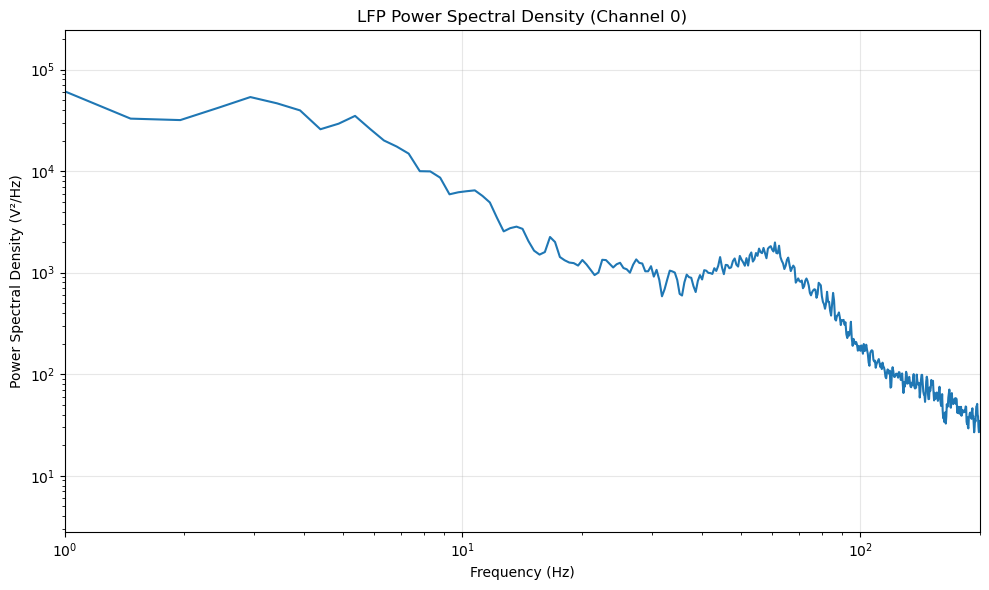

In [12]:
# Perform spectral analysis on a representative LFP channel
from scipy import signal

# Use a longer time window for better frequency resolution
time_window_spec = 60  # seconds
n_samples_spec = int(time_window_spec * lfp.rate)
lfp_channel = lfp.data[:n_samples_spec, 0]  # Use first channel

# Compute power spectral density
freqs, psd = signal.welch(lfp_channel, fs=lfp.rate, nperseg=2048)

# Plot power spectral density
fig, ax = plt.subplots(figsize=(10, 6))
ax.loglog(freqs, psd)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (V²/Hz)')
ax.set_title('LFP Power Spectral Density (Channel 0)')
ax.grid(True, alpha=0.3)
ax.set_xlim([1, 200])  # Focus on relevant frequency range
plt.tight_layout()
plt.show()

## Cross-Subject Comparison

Let's examine data from multiple subjects to understand variability.

In [13]:
# Load basic stats from multiple files
subjects_info = []

for asset in nwb_files[:6]:  # Sample first 6 files from different sessions
    try:
        # Load file
        url = asset.download_url
        remote_file = remfile.File(url)
        h5_file = h5py.File(remote_file)
        io = pynwb.NWBHDF5IO(file=h5_file)
        nwb_temp = io.read()
        
        # Get basic information
        subject_id = nwb_temp.subject.subject_id if nwb_temp.subject else "Unknown"
        session_id = nwb_temp.identifier
        
        # Get breathing event count (sample first 100 events)
        behavior_temp = nwb_temp.processing['behavior']
        n_breathing_events = min(100, len(behavior_temp.data_interfaces['inhalation_time'].timestamps))
        
        subjects_info.append({
            'subject_id': subject_id,
            'session_id': session_id,
            'n_breathing_events': n_breathing_events,
            'file_path': asset.path
        })
        
        # Clean up
        io.close()
        h5_file.close()
        
    except Exception as e:
        print(f"Error loading {asset.path}: {e}")

# Display summary
df = pd.DataFrame(subjects_info)
print("Summary of examined sessions:")
print(df.to_string(index=False))

Summary of examined sessions:
subject_id session_id  n_breathing_events                                         file_path
      4122     4122_4                 100 sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
      4122     4122_5                 100 sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb
      4122     4122_6                 100 sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb
      4127    4127_10                 100 sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb
      4127    4127_14                 100 sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb
      4127     4127_2                 100 sub-4127/sub-4127_ses-20250507T153010_ecephys.nwb


## Summary and Future Analyses

This dandiset provides rich simultaneous recordings of olfactory bulb LFP and breathing behavior in freely-behaving mice. Key features include:

- **High-resolution electrophysiology**: 16-channel LFP at 1 kHz from olfactory bulb
- **Breathing monitoring**: Thermistor-based sniffing detection with processed event timing
- **Naturalistic conditions**: No task or stimuli, capturing spontaneous neural-behavioral relationships

**Potential research directions:**
- Investigate coupling between breathing rhythm and neural oscillations
- Analyze spatial patterns of LFP activity across recording sites
- Examine individual differences in breathing-neural relationships
- Study temporal dynamics of neural-respiratory coordination